In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
titanic_data = pd.read_csv("C:/Users/Testbook/Downloads/titanic/train.csv")

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_data.drop(columns=['Name'], inplace = True)

In [6]:
titanic_data.drop(columns=['Sex'], inplace = True)

In [7]:
titanic_data.drop(columns=['Ticket'],inplace = True)

In [8]:
titanic_data.drop(columns=['Cabin', 'Embarked'], inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

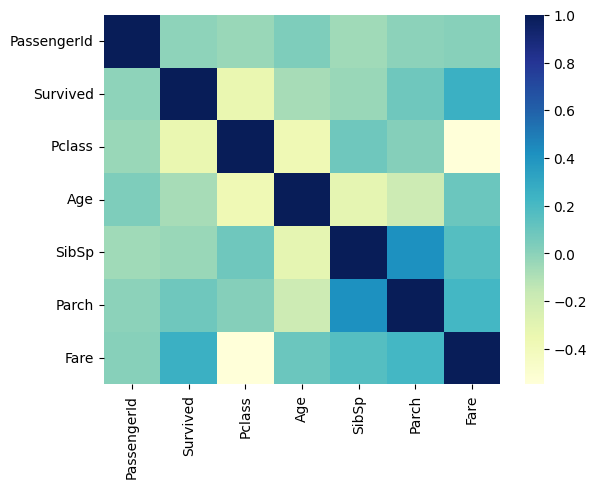

In [9]:
import seaborn as sns
sns.heatmap(titanic_data.corr(), cmap="YlGnBu")
plt.show

In [10]:
titanic_data = pd.read_csv("C:/Users/Testbook/Downloads/titanic/train.csv")

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[['Survived', 'Pclass','Sex']]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

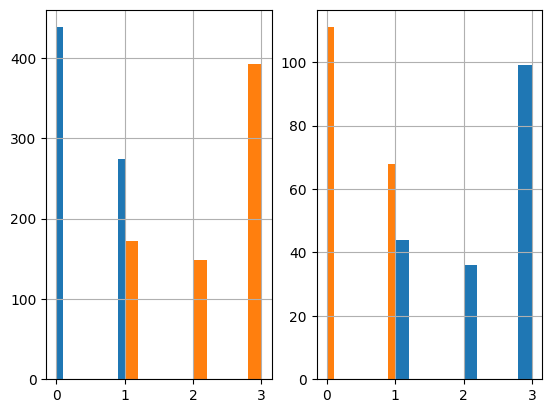

In [12]:
plt.subplot(1, 2, 1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()
plt.subplot(1, 2, 2)
strat_test_set['Pclass'].hist()
strat_test_set['Survived'].hist()
plt.show()


In [24]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 70 to 789
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
      return self
    def transform(self, X):
       imputer = SimpleImputer(strategy="mean")
       X['Age'] = imputer.fit_transform(X[['Age']])
       return X


In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder(sparse=False)  # Add sparse=False to avoid sparse matrix output
        
        # Encoding 'Embarked' column
        matrix = encoder.fit_transform(X[['Embarked']])
        column_names = encoder.categories_[0]  # Dynamically get column names
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        # Encoding 'Sex' column
        matrix = encoder.fit_transform(X[['Sex']])
        column_names = encoder.categories_[0]  # Dynamically get column names
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        return X


In [15]:
class FeatureDropper(BaseEstimator, TransformerMixin):

     def fit(self, X, y=None):
          return self 
     def transform(self, X):
         return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [16]:
from sklearn.pipeline import Pipeline 
pipeline = Pipeline([("ageimputer", AgeImputer()),
                      ("featureencoder", FeatureEncoder()),
                      ("featuredropper", FeatureDropper())])

In [17]:
strat_train_set = pipeline.fit_transform(strat_train_set)

C:\Users\Testbook\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Testbook\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 775 to 755
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   Q            712 non-null    float64
 9   S            712 non-null    float64
 10  nan          712 non-null    float64
 11  female       712 non-null    float64
 12  male         712 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 77.9 KB


In [19]:
strat_train_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,NaN,female,male
775,776,0,3,18.000000,0,0,7.75,0.0,0.0,1.0,0.0,0.0,1.0
324,325,0,3,29.357754,8,2,69.55,0.0,0.0,1.0,0.0,0.0,1.0
196,197,0,3,29.357754,0,0,7.75,0.0,1.0,0.0,0.0,0.0,1.0
161,162,1,2,40.000000,0,0,15.75,0.0,0.0,1.0,0.0,1.0,0.0
820,821,1,1,52.000000,1,1,93.50,0.0,0.0,1.0,0.0,1.0,0.0


In [24]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming the dataframe is named 'strat_train_set'
# Example: strat_train_set = pd.read_csv('your_data.csv')

# Drop the 'Survived' column to create feature set X
X = strat_train_set.drop(columns=['Survived', 'PassengerId'], axis=1)

# Convert all column names to strings to avoid any issues
X.columns = X.columns.astype(str)

# Extract the 'Survived' column to create target variable y
y = strat_train_set['Survived']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the feature set
X_data = scaler.fit_transform(X)

# Convert the target variable to a NumPy array
y_data = y.to_numpy()

# Now X_data contains the scaled features and y_data contains the target variable


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the RandomForestClassifier
clf = RandomForestClassifier()

# Define the parameter grid for the GridSearchCV
param_grid = {
    "n_estimators": [10, 100, 200, 500],        # Number of trees in the forest
    "max_depth": [None, 5, 10],                 # Maximum depth of the tree
    "min_samples_split": [2, 3, 4]              # Minimum number of samples required to split an internal node
}

# Initialize GridSearchCV with the classifier, parameter grid, and other settings
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_data, y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [27]:
final_clf = grid_search.best_estimator_

In [28]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=200)

In [29]:
strat_test_set = pipeline.fit_transform(strat_test_set)

C:\Users\Testbook\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Testbook\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
X_test = strat_train_set.drop(columns=['Survived', 'PassengerId'], axis=1)
X_test.columns = X_test.columns.astype(str)

y_test = strat_train_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [34]:
final_clf.score(X_data_test, y_data_test)

0.9382022471910112

In [35]:
final_data = pipeline.fit_transform(titanic_data)

C:\Users\Testbook\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Testbook\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,NaN,female,male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,0.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,0.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,0.0,1.0


In [38]:

y_final = final_data['Survived']
X_final = final_data.drop(columns=['Survived', 'PassengerId'], axis=1)
X_final.columns = X_final.columns.astype(str)
scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [39]:
prod_clf = RandomForestClassifier()

# Define the parameter grid for the GridSearchCV
param_grid = {
    "n_estimators": [10, 100, 200, 500],        # Number of trees in the forest
    "max_depth": [None, 5, 10],                 # Maximum depth of the tree
    "min_samples_split": [2, 3, 4]              # Minimum number of samples required to split an internal node
}

# Initialize GridSearchCV with the classifier, parameter grid, and other settings
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [41]:
prod_final_clf = grid_search.best_estimator_

In [42]:
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3)

In [43]:
titanic_test_data = pd.read_csv("C:/Users/Testbook/Downloads/titanic/test.csv")

In [44]:
final_test_data = pipeline.fit_transform(titanic_test_data)

C:\Users\Testbook\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Testbook\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [45]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [48]:
X_final_test = final_test_data 
X_final_test = X_final_test.fillna(method='ffill')
X_final_test.columns = X_final.columns.astype(str)
scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

C:\Users\Testbook\AppData\Local\Temp\ipykernel_22824\3369932006.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = X_final_test.fillna(method='ffill')


In [49]:
predictions = prod_final_clf.predict(X_data_final_test)

In [51]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("C:/Users/Testbook/Downloads/titanic/predictions.csv", index = False)

In [52]:
final_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
